In [1]:
from sklearn.datasets import load_linnerud
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
linnerud = load_linnerud()

In [2]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [3]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


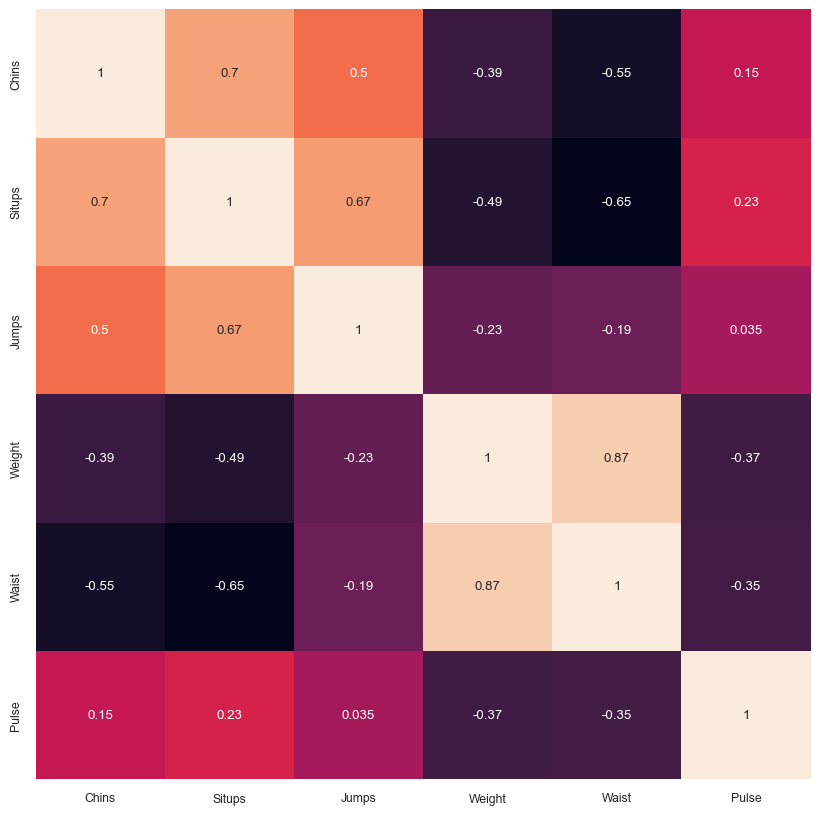

In [4]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [5]:
X=df.drop(['Weight','Waist','Pulse'],axis=1)
Y = df['Pulse']
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [6]:
X

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [7]:
Y

0     50.0
1     52.0
2     58.0
3     62.0
4     46.0
5     56.0
6     56.0
7     60.0
8     74.0
9     56.0
10    50.0
11    52.0
12    64.0
13    50.0
14    46.0
15    62.0
16    54.0
17    52.0
18    54.0
19    68.0
Name: Pulse, dtype: float64

In [8]:
import numpy as np

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(168, activation = 'relu', input_shape = (3,)))
model.add(Dense(94, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 168)               672       
                                                                 
 dense_16 (Dense)            (None, 94)                15886     
                                                                 
 dense_17 (Dense)            (None, 1)                 95        
                                                                 
Total params: 16,653
Trainable params: 16,653
Non-trainable params: 0
_________________________________________________________________


In [30]:

import tensorflow as tf
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs=N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 0s 337ms/step - loss: 3023.8425 - mse: 3023.8425 - val_loss: 3907.2346 - val_mse: 3907.2346
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 2993.8660 - mse: 2993.8660 - val_loss: 3877.2856 - val_mse: 3877.2856
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 2971.0830 - mse: 2971.0830 - val_loss: 3850.4409 - val_mse: 3850.4409
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 2950.3853 - mse: 2950.3853 - val_loss: 3825.6699 - val_mse: 3825.6699
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 2930.7366 - mse: 2930.7366 - val_loss: 3801.0647 - val_mse: 3801.0647
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 2911.4443 - mse: 2911.4443 - val_loss: 3776.0879 - val_mse: 3776.0879
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 2892.1499 - mse: 2892.1499 - val_loss: 3751.1606 - val_mse: 3751.1606
Epoch

In [31]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 16ms/step - loss: 411.5868 - mse: 411.5868


[411.5868225097656, 411.5868225097656]

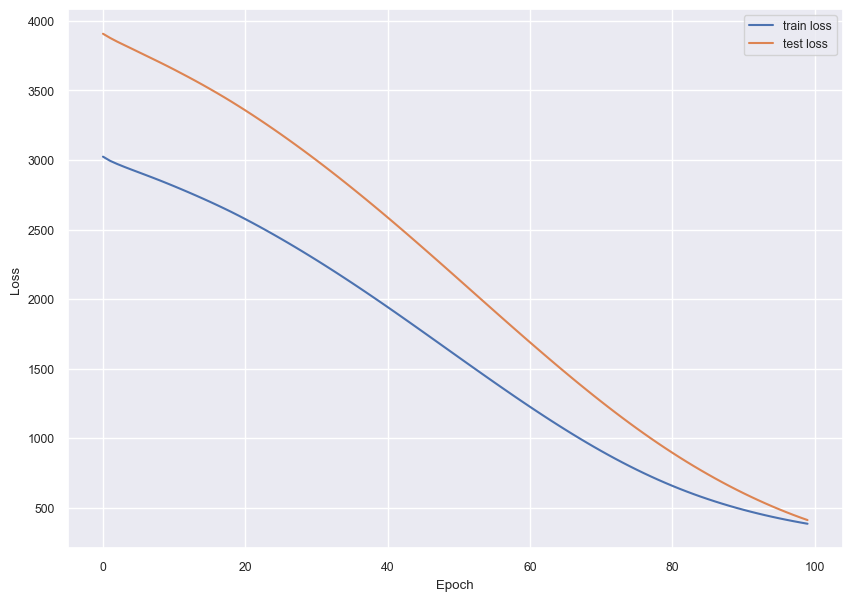

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()